In [ ]:
from collections import defaultdict

def read_file(file_path):
    """
    Read the text file and split the content into a list of words.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        # Tokenize the text by whitespace
        words = text.split()
    return words

def get_vocab(text):
    """
    Convert the input text into a dictionary where the keys are words
    and the values are lists of characters.
    """
    vocab = defaultdict(int)
    for word in text:
        word = tuple(word)  # Represent each word as a tuple of characters
        vocab[word] += 1
    return vocab

def get_stats(vocab):
    """
    Get the frequency of adjacent character pairs in the vocab.
    """
    pair_freq = defaultdict(int)
    for word, freq in vocab.items():
        for i in range(len(word) - 1):
            pair = (word[i], word[i + 1])
            pair_freq[pair] += freq
    return pair_freq

def merge_vocab(pair, vocab):
    """
    Merge the most frequent pair in the vocabulary.
    """
    bigram = ' '.join(pair)
    replacement = ''.join(pair)

    new_vocab = {}
    for word in vocab:
        new_word = list(word)
        i = 0
        while i < len(new_word) - 1:
            if (new_word[i], new_word[i + 1]) == pair:
                new_word[i] = replacement
                del new_word[i + 1]
            else:
                i += 1
        new_vocab[tuple(new_word)] = vocab[word]

    return new_vocab

def bpe_tokenizer(text, num_merges):
    """
    Apply BPE tokenization to a list of words.

    :param text: A list of words to be tokenized
    :param num_merges: Number of BPE merges to perform
    :return: Tokenized version of the text
    """
    vocab = get_vocab(text)

    for i in range(num_merges):
        # Get the frequency of character pairs
        pair_freq = get_stats(vocab)

        if not pair_freq:
            break

        # Find the most frequent pair
        best_pair = max(pair_freq, key=pair_freq.get)

        # Merge the best pair
        vocab = merge_vocab(best_pair, vocab)
        # print(f"Merge {i+1}: {best_pair} -> {vocab}")

    return vocab

def process_file(file_path, num_merges):
    """
    Read the file and apply BPE tokenization.

    :param file_path: Path to the text file
    :param num_merges: Number of merges to apply
    """
    # Read the file and get the list of words
    words = read_file(file_path)

    # Apply BPE tokenization to the list of words
    tokenized_vocab = bpe_tokenizer(words, num_merges)

    return tokenized_vocab

# Example Usage

file_path = 'big.txt'  # Replace this with the path to your text file
num_merges = 10  # Number of merges for BPE

tokenized_vocab = process_file(file_path, num_merges)
print("Final Tokenized Vocab:", tokenized_vocab)


Final Tokenized Vocab: {('T', 'he'): 6149, ('P', 'r', 'o', 'j', 'e', 'c', 't'): 205, ('G', 'u', 't', 'en', 'b', 'er', 'g'): 78, ('E', 'B', 'o', 'o', 'k'): 5, ('o', 'f'): 39169, ('A', 'd', 'v', 'en', 't', 'u', 're', 's'): 2, ('S', 'he', 'r', 'l', 'o', 'c', 'k'): 95, ('H', 'o', 'l', 'm', 'e', 's'): 198, ('b', 'y'): 6384, ('S', 'i', 'r'): 30, ('A', 'r', 't', 'h', 'u', 'r'): 18, ('C', 'on', 'an'): 3, ('D', 'o', 'y', 'l', 'e'): 2, ('(', '#', '1', '5'): 1, ('in',): 19515, ('o', 'u', 'r'): 969, ('s', 'er', 'i', 'e', 's'): 88, ('D', 'o', 'y', 'l', 'e', ')'): 1, ('C', 'o', 'p', 'y', 'r', 'i', 'g', 'h', 't'): 6, ('l', 'a', 'w', 's'): 166, ('a', 're'): 3418, ('c', 'h', 'an', 'g', 'in', 'g'): 40, ('a', 'l', 'l'): 3349, ('o', 'v', 'er'): 1141, ('the',): 71744, ('w', 'o', 'r', 'l', 'd', '.'): 48, ('B', 'e'): 19, ('s', 'u', 're'): 103, ('t', 'o'): 27895, ('c', 'he', 'c', 'k'): 35, ('c', 'o', 'p', 'y', 'r', 'i', 'g', 'h', 't'): 42, ('f', 'o', 'r'): 6358, ('y', 'o', 'u', 'r'): 1116, ('c', 'o', 'u', 'n'

BPE on self data

In [ ]:
file_path = "big.txt"  # Replace with your file's path
with open(file_path, 'r') as file:
    content = file.read()
    print(content[:2500])

The Project Gutenberg EBook of The Adventures of Sherlock Holmes
by Sir Arthur Conan Doyle
(#15 in our series by Sir Arthur Conan Doyle)

Copyright laws are changing all over the world. Be sure to check the
copyright laws for your country before downloading or redistributing
this or any other Project Gutenberg eBook.

This header should be the first thing seen when viewing this Project
Gutenberg file.  Please do not remove it.  Do not change or edit the
header without written permission.

Please read the "legal small print," and other information about the
eBook and Project Gutenberg at the bottom of this file.  Included is
important information about your specific rights and restrictions in
how the file may be used.  You can also find out about how to make a
donation to Project Gutenberg, and how to get involved.


**Welcome To The World of Free Plain Vanilla Electronic Texts**

**eBooks Readable By Both Humans and By Computers, Since 1971**

*****These eBooks Were Prepared By Thousan

In [ ]:
import re
import string

# 1. Lowercase the text
def lowercase_text(text):
    return text.lower()

# 2. Remove extra spaces
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

# 3. Remove punctuation (optional, depending on your task)
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# 4. Remove special characters (optional, based on your data)
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# 5. Basic preprocessing pipeline
def preprocess_text(text, remove_punct=True, remove_special=True):
    text = lowercase_text(text)
    text = remove_extra_spaces(text)

    if remove_punct:
        text = remove_punctuation(text)

    if remove_special:
        text = remove_special_characters(text)

    return text

# Example usage with your data
training_data = content

# Preprocess the training data
processed_data = [preprocess_text(sentence) for sentence in training_data]

# Check the processed data
for i, text in enumerate(processed_data[:30]):
    print(f"Original: {training_data[i]}")
    print(f"Processed: {text}\n")


NameError: name 'content' is not defined

In [ ]:
from tokenizers import Tokenizer, models, pre_tokenizers, trainers

# Step 1: Define the tokenizer model
tokenizer = Tokenizer(models.BPE())

# Step 2: Define a pre-tokenizer (splits words into individual characters or words)
tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)

# Step 3: Load your data (a list of sentences, for example)
# Replace `training_data` with your actual training corpus (list of sentences)
training_data = processed_data

# Step 4: Create a trainer and specify the vocab size (e.g., 30k or 50k)
trainer = trainers.BpeTrainer(vocab_size=10000, min_frequency=10, show_progress=True)

# Step 5: Train the tokenizer on the data
tokenizer.train_from_iterator(training_data, trainer)

# Step 6: Save the trained tokenizer to a file
tokenizer.save("bpe_tokenizer.json")

# Now the tokenizer is ready to use


In [ ]:
from tokenizers import Tokenizer

# Load the trained tokenizer
tokenizer = Tokenizer.from_file("bpe_tokenizer.json")

# Test tokenization
encoded = tokenizer.encode("This is a new sentence to tokenize.")
print(f"Token IDs: {encoded.ids}")
print(f"Tokens: {encoded.tokens}")

Token IDs: [17, 18, 28, 18, 28, 10, 23, 14, 32, 28, 14, 23, 29, 14, 23, 12, 14, 29, 24, 29, 24, 20, 14, 23, 18, 35, 14]
Tokens: ['h', 'i', 's', 'i', 's', 'a', 'n', 'e', 'w', 's', 'e', 'n', 't', 'e', 'n', 'c', 'e', 't', 'o', 't', 'o', 'k', 'e', 'n', 'i', 'z', 'e']


# Implementing a GPT model from Scratch

In [1]:
from transformers import GPT2Tokenizer

# Initialize the BPE tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

text = "Every day is your."
encoded_input = tokenizer.encode(text, return_tensors='pt')  # Returns a tensor
print(f"Encoded input: {encoded_input}")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Encoded input: tensor([[6109, 1110,  318,  534,   13]])


In [21]:
import torch
import torch.nn as nn
import math


# Configuration for GPT-2
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 512, # Context length
    "emb_dim": 512,         # Embedding dimension
    "n_heads": 4,          # Number of attention heads
    "n_layers": 4,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

#### **1. Token Embedding**

In [22]:
# 1. Embedding Layer
class Embedding(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super().__init__()
        # Initialize the embedding layer with the specified vocabulary size and embedding dimension
        self.embed = nn.Embedding(vocab_size, embed_size)

    def forward(self, x):
        # Forward pass: convert input token IDs to their corresponding embeddings
        return self.embed(x)

# Test Embedding
# Create an instance of the Embedding layer using the configuration values
embedding = Embedding(GPT_CONFIG_124M["vocab_size"], GPT_CONFIG_124M["emb_dim"])

# Generate random input token IDs with shape (batch_size, seq_length)
input_ids = torch.randint(0, GPT_CONFIG_124M["vocab_size"], (2, 10))

# Apply the embedding layer to the input token IDs
embed_output = embedding(input_ids)

# Print the shape of the output embeddings
print(f"Embedding output shape: {embed_output.shape}")

# Assert that the output shape matches the expected shape
# Expected shape: (batch_size, seq_length, embed_size)
assert embed_output.shape == (2, 10, GPT_CONFIG_124M["emb_dim"]), "Embedding shape mismatch"

Embedding output shape: torch.Size([2, 10, 512])


#### **2. Positional Encoding**

In [23]:
# 2. Positional Encoding
class PositionalEncoding(nn.Module):
    def __init__(self, embed_size, max_seq_length=512):
        super().__init__()
        # Initialize a tensor to hold the positional encodings
        pe = torch.zeros(max_seq_length, embed_size)

        # Create a tensor for positions (0 to max_seq_length)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)

        # Calculate the division term for the sine and cosine functions
        div_term = torch.exp(torch.arange(0, embed_size, 2).float() * -(math.log(10000.0) / embed_size))

        # Apply sine to even indices and cosine to odd indices
        pe[:, 0::2] = torch.sin(position * div_term)  # Sine for even indices
        pe[:, 1::2] = torch.cos(position * div_term)  # Cosine for odd indices

        # Register the positional encodings as a buffer (not a model parameter)
        self.register_buffer('pe', pe.unsqueeze(0))  # Shape: (1, max_seq_length, embed_size)

    def forward(self, x):
        # Add the positional encodings to the input embeddings
        return x + self.pe[:, :x.size(1)]

# Test Positional Encoding
# Create an instance of the PositionalEncoding layer using the configuration values
pos_encoding = PositionalEncoding(GPT_CONFIG_124M["emb_dim"], GPT_CONFIG_124M["context_length"])

# Apply the positional encoding to the output of the embedding layer
pos_output = pos_encoding(embed_output)

# Print the shape of the output after adding positional encodings
print(f"Positional Encoding output shape: {pos_output.shape}")

# Assert that the output shape matches the expected shape
assert pos_output.shape == embed_output.shape, "Positional Encoding shape mismatch"

Positional Encoding output shape: torch.Size([2, 10, 512])


#### **3. Transformer Block**

##### **A. Multi-Head Attention**

In [24]:
# A. Multi-Head Attention
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_size, num_heads, qkv_bias=False):
        super().__init__()
        self.embed_size = embed_size
        self.num_heads = num_heads
        self.head_dim = embed_size // num_heads

        self.query = nn.Linear(embed_size, embed_size, bias=qkv_bias)
        self.key = nn.Linear(embed_size, embed_size, bias=qkv_bias)
        self.value = nn.Linear(embed_size, embed_size, bias=qkv_bias)
        self.out = nn.Linear(embed_size, embed_size)

    def forward(self, x, mask=None):
        batch_size = x.shape[0]

        q = self.query(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        k = self.key(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        v = self.value(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)

        attention = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(self.head_dim)
        if mask is not None:
            attention = attention.masked_fill(mask == 0, float('-inf'))
        attention = torch.softmax(attention, dim=-1)

        out = torch.matmul(attention, v)
        out = out.transpose(1, 2).contiguous().view(batch_size, -1, self.embed_size)
        return self.out(out)

# Test Multi-Head Attention
mha = MultiHeadAttention(GPT_CONFIG_124M["emb_dim"], GPT_CONFIG_124M["n_heads"])
mha_output = mha(pos_output)
print(f"Multi-Head Attention output shape: {mha_output.shape}")
assert mha_output.shape == pos_output.shape, "Multi-Head Attention shape mismatch"


Multi-Head Attention output shape: torch.Size([2, 10, 512])


## MQA

In [25]:
# A. Multi-Query Attention
class MultiQueryAttention(nn.Module):
    def __init__(self, embed_size, num_heads, qkv_bias=False):
        super().__init__()
        self.embed_size = embed_size
        self.num_heads = num_heads
        self.head_dim = embed_size // num_heads

        # Queries still use multi-head projections
        self.query = nn.Linear(embed_size, embed_size, bias=qkv_bias)

        # Keys and Values use single-head projections
        self.key = nn.Linear(embed_size, self.head_dim, bias=qkv_bias)
        self.value = nn.Linear(embed_size, self.head_dim, bias=qkv_bias)

        self.out = nn.Linear(embed_size, embed_size)

    def forward(self, x, mask=None):
        batch_size, seq_len, _ = x.size()

        # Multi-head queries
        q = self.query(x).view(batch_size, seq_len, self.num_heads, self.head_dim)
        q = q.transpose(1, 2)  # (B, n_heads, seq_len, head_dim)

        # Single-head key and value (shared across heads)
        k = self.key(x).unsqueeze(1)  # (B, 1, seq_len, head_dim)
        v = self.value(x).unsqueeze(1)  # (B, 1, seq_len, head_dim)

        # Scaled dot-product attention
        attn = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(self.head_dim)  # (B, n_heads, seq, seq)

        if mask is not None:
            attn = attn.masked_fill(mask == 0, float("-inf"))

        attn = torch.softmax(attn, dim=-1)

        # Combine attention with shared values
        out = torch.matmul(attn, v)  # (B, n_heads, seq_len, head_dim)

        # Merge heads
        out = out.transpose(1, 2).contiguous().view(batch_size, seq_len, self.embed_size)

        return self.out(out)


##### **B. LayerNorm**

In [35]:
# 4. Layer Normalization (Just for explanation, we used nn.LayerNorm later)
class LayerNorm(nn.Module):
    def __init__(self, emb_dim, eps=1e-5):
        super().__init__()
        self.eps = eps
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        # Calculate mean and variance
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)

        # Normalize the input
        norm_x = (x - mean) / torch.sqrt(var + self.eps)

        # Scale and shift
        return self.scale * norm_x + self.shift

In [45]:
# Test LayerNorm
emb_dim = GPT_CONFIG_124M["emb_dim"]
layer_norm = LayerNorm(emb_dim)

# Create a random input tensor with shape (batch_size, seq_length, emb_dim)
batch_size = 2
seq_length = 10
input_tensor = torch.randn(batch_size, seq_length, emb_dim)

# Apply LayerNorm
ln_output = layer_norm(input_tensor)

# Check output shape
print(f"LayerNorm output shape: {ln_output.shape}")
assert ln_output.shape == input_tensor.shape, "LayerNorm output shape mismatch"

# Check if the mean and variance of the output are approximately 0 and 1
output_mean = ln_output.mean(dim=-1)
output_var = ln_output.var(dim=-1, unbiased=False)

# Check mean
assert torch.allclose(output_mean, torch.zeros(batch_size, seq_length), atol=1e-6), "Mean is not close to 0"

# Check variance
assert torch.allclose(output_var, torch.ones(batch_size, seq_length), atol=1e-6), "Variance is not close to 1"

print("LayerNorm test passed!")

LayerNorm output shape: torch.Size([2, 10, 512])
LayerNorm test passed!


##### **C. Feed-Forward Network**

In [46]:
# 5. Feed-Forward Network
class FeedForward(nn.Module):
    def __init__(self, embed_size, ff_hidden_size):
        super().__init__()
        # First linear layer that transforms input from embedding size to hidden size
        self.fc1 = nn.Linear(embed_size, ff_hidden_size)
        # Second linear layer that transforms from hidden size back to embedding size
        self.fc2 = nn.Linear(ff_hidden_size, embed_size)
        # GELU activation function
        self.gelu = nn.GELU()

    def forward(self, x):
        # Forward pass: apply the first linear layer, then GELU activation, and finally the second linear layer
        return self.fc2(self.gelu(self.fc1(x)))

# Test Feed-Forward Network
# Define the hidden size for the feed-forward network (4 times the embedding size)
ff_hidden_size = GPT_CONFIG_124M["emb_dim"] * 4
# Create an instance of the FeedForward network
ff = FeedForward(GPT_CONFIG_124M["emb_dim"], ff_hidden_size)

# Apply the FeedForward network to the output of the multi-head attention layer
ff_output = ff(mha_output)

# Print the shape of the output after applying the FeedForward network
print(f"Feed-Forward output shape: {ff_output.shape}")

# Assert that the output shape matches the expected shape
assert ff_output.shape == mha_output.shape, "Feed-Forward shape mismatch"

Feed-Forward output shape: torch.Size([2, 10, 512])


##### **A,B & C combined into Transformer Block**

In [47]:
# 6. Transformer Block
class TransformerBlock(nn.Module):
    def __init__(self, embed_size, num_heads, ff_hidden_size, dropout=0.1, qkv_bias=False):
        super().__init__()
        # Initialize the multi-head attention layer
        self.mha = MultiQueryAttention(embed_size, num_heads, qkv_bias)
        # Initialize the feed-forward network
        self.ff = FeedForward(embed_size, ff_hidden_size)
        # Initialize layer normalization for the attention output
        self.ln1 = nn.LayerNorm(embed_size)
        # Initialize layer normalization for the feed-forward output
        self.ln2 = nn.LayerNorm(embed_size)
        # Initialize dropout layer
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        # Apply multi-head attention and add the residual connection, followed by layer normalization
        attention_output = self.ln1(x + self.dropout(self.mha(x, mask)))
        # Apply feed-forward network and add the residual connection, followed by layer normalization
        ff_output = self.ln2(attention_output + self.dropout(self.ff(attention_output)))
        return ff_output

# Test Transformer Block
# Create an instance of the TransformerBlock using the configuration values
transformer = TransformerBlock(GPT_CONFIG_124M["emb_dim"], GPT_CONFIG_124M["n_heads"], ff_hidden_size)

# Apply the transformer block to the output of the positional encoding layer
transformer_output = transformer(pos_output)

# Print the shape of the output after applying the transformer block
print(f"Transformer Block output shape: {transformer_output.shape}")

# Assert that the output shape matches the expected shape
assert transformer_output.shape == pos_output.shape, "Transformer Block shape mismatch"

Transformer Block output shape: torch.Size([2, 10, 512])


##### **4. GPT-2 Model**

In [48]:
# 7. GPT-2 Model
class GPT2(nn.Module):
    def __init__(self, config):
        super().__init__()
        # Initialize the embedding layer to convert token IDs to embeddings
        self.embedding = Embedding(config["vocab_size"], config["emb_dim"])

        # Initialize positional encoding to add positional information to embeddings
        self.positional_encoding = PositionalEncoding(config["emb_dim"], config["context_length"])

        # Create a list of transformer blocks
        self.transformer_blocks = nn.ModuleList([
            # Each transformer block consists of multi-head attention and feed-forward layers
            TransformerBlock(config["emb_dim"], config["n_heads"], config["emb_dim"] * 4, config["drop_rate"], config["qkv_bias"])
            for _ in range(config["n_layers"])  # Repeat for the number of layers specified in the config
        ])

        # Final linear layer to project the output back to the vocabulary size for logits
        self.fc_out = nn.Linear(config["emb_dim"], config["vocab_size"])

        # Dropout layer for regularization
        self.dropout = nn.Dropout(config["drop_rate"])

    def forward(self, x, mask=None):
        # Step 1: Convert input token IDs to embeddings and add positional encodings
        x = self.dropout(self.positional_encoding(self.embedding(x)))

        # Step 2: Pass the embeddings through each transformer block
        for block in self.transformer_blocks:
            x = block(x, mask)  # Apply the transformer block with optional masking

        # Step 3: Project the final output to the vocabulary size
        return self.fc_out(x)  # Shape: (batch_size, seq_length, vocab_size)

# Test GPT-2 Model
# Create an instance of the GPT-2 model using the configuration values
model = GPT2(GPT_CONFIG_124M)

# Generate random input token IDs with shape (batch_size, seq_length)
input_ids = torch.randint(0, GPT_CONFIG_124M["vocab_size"], (2, 64))

# Apply the model to the input token IDs
output = model(input_ids)

# Print the shape of the output from the model
print(f"GPT-2 Model output shape: {output.shape}")

# Assert that the output shape matches the expected shape
assert output.shape == (2, 64, GPT_CONFIG_124M["vocab_size"]), "GPT-2 Model shape mismatch"

GPT-2 Model output shape: torch.Size([2, 64, 50257])


## Generate output using GPT-2 Model

The modle is not trained yet, but lets try to generate 5 new tokens for our text using GPT-2 untrained model

In [49]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    """
    Generate text using the provided model by predicting the next tokens based on the current context.

    Parameters:
    - model: The language model used for generating text.
    - idx: A tensor of shape (batch, n_tokens) containing the current context token indices.
    - max_new_tokens: The maximum number of new tokens to generate.
    - context_size: The maximum number of tokens to consider from the context.

    Returns:
    - idx: The updated tensor containing the original context and the newly generated tokens.
    """
    # Loop to generate the specified number of new tokens
    for _ in range(max_new_tokens):
        # Step 1: Prepare the context
        # Crop the current context to the last 'context_size' tokens
        idx_cond = idx[:, -context_size:]  # Shape: (batch, context_size)

        # Step 2: Get model predictions
        with torch.no_grad():  # Disable gradient calculation for inference
            logits = model(idx_cond)  # Shape: (batch, n_tokens, vocab_size)

        # Step 3: Focus on the last time step's predictions
        logits = logits[:, -1, :]  # Shape: (batch, vocab_size)

        # Step 4: Convert logits to probabilities using softmax
        probas = torch.softmax(logits, dim=-1)  # Shape: (batch, vocab_size)

        # Step 5: Get the index of the token with the highest probability
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)  # Shape: (batch, 1)

        # Step 6: Append the predicted token index to the sequence
        idx = torch.cat((idx, idx_next), dim=1)  # Shape: (batch, n_tokens + 1)

    return idx  # Return the updated sequence of token indices

# Initial context for text generation
start_context = "What is the capital of India"

# Step 1: Encode the initial context into token indices
encoded = tokenizer.encode(start_context)
print("Encoded:", encoded)

# Step 2: Convert the encoded list into a tensor and add a batch dimension
encoded_tensor = torch.tensor(encoded).unsqueeze(0)  # Shape: (1, n_tokens)
print("Encoded tensor shape:", encoded_tensor.shape)

# Set the model to evaluation mode to disable dropout
model.eval()

# Step 3: Generate new tokens based on the initial context
out = generate_text_simple(
    model=model,
    idx=encoded_tensor,
    max_new_tokens=5,
    context_size=GPT_CONFIG_124M["context_length"]
)

# Step 4: Print the output tensor and its length
print("Output:", out)
print("Output length:", len(out[0]))

# Step 5: Decode the generated token indices back into text
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print("Decoded text:", decoded_text)

Encoded: [2061, 318, 262, 3139, 286, 3794]
Encoded tensor shape: torch.Size([1, 6])
Output: tensor([[ 2061,   318,   262,  3139,   286,  3794,  2468, 16392, 10439, 13591,
          2735]])
Output length: 11
Decoded text: What is the capital of Indiavironment holders generations batteries Now


# Train

In [50]:
# GPT-2 Training Code
# This notebook contains the training implementation for the GPT-2 model

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import math
import os
from transformers import GPT2Tokenizer
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle

# Import the model classes from your implementation
# (Assuming they are already defined in the previous cells)

In [51]:
# ================================
# Dataset Preparation
# ================================

class TextDataset(Dataset):
    """
    Custom dataset class for text data that creates input-target pairs
    for language modeling training.
    """
    def __init__(self, text_data, tokenizer, max_length=512):
        self.tokenizer = tokenizer
        self.max_length = max_length

        # Tokenize the entire text
        self.tokens = tokenizer.encode(text_data)
        print(f"Total tokens in dataset: {len(self.tokens)}")

        # Create sliding window samples
        self.samples = []
        for i in range(0, len(self.tokens) - max_length, max_length // 2):
            sample = self.tokens[i:i + max_length + 1]  # +1 for target
            if len(sample) == max_length + 1:
                self.samples.append(sample)

        print(f"Total samples created: {len(self.samples)}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]
        # Input is all tokens except the last one
        input_ids = torch.tensor(sample[:-1], dtype=torch.long)
        # Target is all tokens except the first one (shifted by 1)
        target_ids = torch.tensor(sample[1:], dtype=torch.long)
        return input_ids, target_ids

In [15]:
file_path = "wikipedia_corpus_ai.txt"  # Replace with your file's path
try:
    with open(file_path, 'r') as file:
        content = file.read()
        print(content[:500])
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Computer science is the study of computation, information, and automation. Included broadly in the sciences, computer science spans theoretical disciplines (such as algorithms, theory of computation, and information theory) to applied disciplines (including the design and implementation of hardware and software). An expert in the field is known as a computer scientist. 
Algorithms and data structures are central to computer science.
The theory of computation concerns abstract models of computati


In [16]:
# ================================
# Sample Data Preparation
# ================================

def load_sample_data():
    """
    Create sample text data for training.
    In practice, you would load your actual dataset here.
    """
    sample_text = """
    The quick brown fox jumps over the lazy dog. This is a sample text for training our GPT-2 model.
    Artificial intelligence is transforming the world in unprecedented ways. Machine learning algorithms
    are becoming more sophisticated and capable of solving complex problems. Natural language processing
    has made significant advances in recent years. Deep learning models like transformers have revolutionized
    the field of AI. GPT models are particularly good at generating human-like text. Training these models
    requires large amounts of text data and computational resources. The attention mechanism is a key
    component that allows these models to understand context and relationships between words. Self-attention
    enables the model to focus on different parts of the input sequence when generating each output token.
    """ * 100  # Repeat to create more data

    return sample_text

In [17]:
# ================================
# Training Configuration
# ================================

TRAINING_CONFIG = {
    "batch_size": 16,
    "learning_rate": 3e-4,
    "num_epochs": 10,
    "max_length": 512,
    "gradient_clip_val": 1.0,
    "save_every": 500,
    "eval_every": 50,
    "warmup_steps": 100,
    "device": "cuda" if torch.cuda.is_available() else "cpu"
}

print(f"Training device: {TRAINING_CONFIG['device']}")

Training device: cuda


In [18]:
# ================================
# Learning Rate Scheduler
# ================================

class CosineWarmupScheduler:
    """
    Cosine learning rate scheduler with linear warmup.
    """
    def __init__(self, optimizer, warmup_steps, total_steps):
        self.optimizer = optimizer
        self.warmup_steps = warmup_steps
        self.total_steps = total_steps
        self.step_count = 0
        # Store initial learning rates from the optimizer's parameter groups
        self.initial_lrs = [param_group['lr'] for param_group in optimizer.param_groups]


    def step(self):
        self.step_count += 1

        if self.step_count <= self.warmup_steps:
            # Linear warmup
            lr_scale = self.step_count / self.warmup_steps
        else:
            # Cosine annealing
            progress = (self.step_count - self.warmup_steps) / (self.total_steps - self.warmup_steps)
            lr_scale = 0.5 * (1 + math.cos(math.pi * progress))

        for i, param_group in enumerate(self.optimizer.param_groups):
            # Use the stored initial learning rate
            param_group['lr'] = self.initial_lrs[i] * lr_scale
            # Print the type of the learning rate for debugging
            # print(f"Step {self.step_count}: LR Type = {type(param_group['lr'])}")

In [19]:
# ================================
# Training Functions
# ================================

def calculate_perplexity(loss):
    """Calculate perplexity from loss."""
    return math.exp(min(loss, 100))  # Cap to prevent overflow

def save_checkpoint(model, optimizer, epoch, step, loss, filepath):
    """Save model checkpoint."""
    checkpoint = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'epoch': epoch,
        'step': step,
        'loss': loss,
        'config': GPT_CONFIG_124M
    }
    torch.save(checkpoint, filepath)
    print(f"Checkpoint saved: {filepath}")

def load_checkpoint(model, optimizer, filepath):
    """Load model checkpoint."""
    checkpoint = torch.load(filepath, map_location=TRAINING_CONFIG['device'])
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    return checkpoint['epoch'], checkpoint['step'], checkpoint['loss']

def evaluate_model(model, eval_dataloader, device):
    """Evaluate model on validation data."""
    model.eval()
    total_loss = 0
    num_batches = 0

    with torch.no_grad():
        for batch_idx, (input_ids, target_ids) in enumerate(eval_dataloader):
            if batch_idx >= 10:  # Evaluate on limited batches for speed
                break

            input_ids = input_ids.to(device)
            target_ids = target_ids.to(device)

            # Forward pass
            logits = model(input_ids)
            loss = nn.CrossEntropyLoss()(
                logits.view(-1, logits.size(-1)),
                target_ids.view(-1)
            )

            total_loss += loss.item()
            num_batches += 1

    model.train()
    return total_loss / num_batches if num_batches > 0 else 0

def train_gpt2():
    """
    Main training function for GPT-2 model.
    """
    # Initialize tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    tokenizer.pad_token = tokenizer.eos_token

    # Load and prepare data
    print("Loading data...")
    text_data = content # content[:1000000]
    # text_data = load_sample_data()

    # Create datasets
    dataset = TextDataset(text_data, tokenizer, TRAINING_CONFIG["max_length"])

    # Split into train and validation
    train_size = int(0.9 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(
        dataset, [train_size, val_size]
    )

    # Create dataloaders
    train_dataloader = DataLoader(
        train_dataset,
        batch_size=TRAINING_CONFIG["batch_size"],
        shuffle=True,
        num_workers=0  # Set to 0 to avoid multiprocessing issues
    )

    val_dataloader = DataLoader(
        val_dataset,
        batch_size=TRAINING_CONFIG["batch_size"],
        shuffle=False,
        num_workers=0
    )

    print(f"Train samples: {len(train_dataset)}, Val samples: {len(val_dataset)}")

    # Initialize model
    print("Initializing model...")
    model = GPT2(GPT_CONFIG_124M)
    model = model.to(TRAINING_CONFIG["device"])

    # Count parameters
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")

    # Initialize optimizer
    optimizer = optim.AdamW(
        model.parameters(),
        lr=TRAINING_CONFIG["learning_rate"],
        weight_decay=0.01,
        betas=(0.9, 0.95)
    )

    # Initialize scheduler
    total_steps = len(train_dataloader) * TRAINING_CONFIG["num_epochs"]
    scheduler = CosineWarmupScheduler(
        optimizer,
        TRAINING_CONFIG["warmup_steps"],
        total_steps
    )

    # Initialize loss function
    criterion = nn.CrossEntropyLoss()

    # Training tracking
    train_losses = []
    val_losses = []
    learning_rates = []
    global_step = 0

    print(f"Starting training for {TRAINING_CONFIG['num_epochs']} epochs...")
    print(f"Total steps: {total_steps}")

    # ================================
    # Training Loop (Fixed)
    # ================================

    for epoch in range(TRAINING_CONFIG["num_epochs"]):
        model.train()
        epoch_losses = []

        # One progress bar for the whole epoch
        pbar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{TRAINING_CONFIG['num_epochs']}")

        for batch_idx, (input_ids, target_ids) in enumerate(pbar):
            # Move data to device
            input_ids = input_ids.to(TRAINING_CONFIG["device"])
            target_ids = target_ids.to(TRAINING_CONFIG["device"])

            # Forward + backward pass
            optimizer.zero_grad()
            logits = model(input_ids)

            loss = criterion(
                logits.view(-1, logits.size(-1)),
                target_ids.view(-1)
            )
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(
                model.parameters(),
                TRAINING_CONFIG["gradient_clip_val"]
            )

            # Optimizer + scheduler
            optimizer.step()
            scheduler.step()

            # Tracking
            current_loss = loss.item()
            epoch_losses.append(current_loss)
            train_losses.append(current_loss)
            learning_rates.append(optimizer.param_groups[0]['lr'])
            global_step += 1

            # ✅ Update tqdm only every 100 steps
            # if global_step % 100 == 0:
            #     pbar.set_postfix({
            #         'loss': f'{current_loss:.4f}',
            #         'ppl': f'{calculate_perplexity(current_loss):.2f}',
            #         'lr': f'{optimizer.param_groups[0]["lr"]:.2e}'
            #     })

            # ✅ Evaluate periodically
            if global_step % TRAINING_CONFIG["eval_every"] == 0:
                val_loss = evaluate_model(model, val_dataloader, TRAINING_CONFIG["device"])
                val_losses.append(val_loss)

            # ✅ Save only latest checkpoint (overwrite)
            # if global_step % TRAINING_CONFIG["save_every"] == 0:
            #     os.makedirs("checkpoints", exist_ok=True)
            #     save_checkpoint(
            #         model, optimizer, epoch, global_step, current_loss,
            #         "checkpoints/latest.pt"  # overwrite each time
            #     )

        os.makedirs("checkpoints", exist_ok=True)
        save_checkpoint(
            model, optimizer, epoch, global_step, current_loss,
            "checkpoints/latest.pt"  # overwrite each time
        )
        # End of epoch summary
        avg_epoch_loss = np.mean(epoch_losses)
        print(f"\nEpoch {epoch+1} completed:")
        print(f"Average Loss: {avg_epoch_loss:.4f}")
        print(f"Perplexity: {calculate_perplexity(avg_epoch_loss):.2f}")
        print("-" * 50)


    # Final evaluation
    print("Running final evaluation...")
    final_val_loss = evaluate_model(model, val_dataloader, TRAINING_CONFIG["device"])
    print(f"Final Validation Loss: {final_val_loss:.4f}")
    print(f"Final Validation Perplexity: {calculate_perplexity(final_val_loss):.2f}")

    # Save final model
    os.makedirs("models", exist_ok=True)
    save_checkpoint(
        model, optimizer, TRAINING_CONFIG["num_epochs"], global_step, final_val_loss,
        "models/gpt2_final.pt"
    )

    # Save training history
    training_history = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'learning_rates': learning_rates,
        'config': TRAINING_CONFIG
    }

    with open("models/training_history.pkl", "wb") as f:
        pickle.dump(training_history, f)

    return model, training_history

In [20]:
# ================================
# Plotting Functions
# ================================

def plot_training_curves(train_losses, val_losses, learning_rates):
    """Plot training curves."""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # Training loss
    ax1.plot(train_losses)
    ax1.set_title('Training Loss')
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Loss')
    ax1.grid(True)

    # Validation loss
    if val_losses:
        eval_steps = np.arange(0, len(train_losses), len(train_losses) // len(val_losses))[:len(val_losses)]
        ax2.plot(eval_steps, val_losses, 'r-', marker='o')
        ax2.set_title('Validation Loss')
        ax2.set_xlabel('Step')
        ax2.set_ylabel('Loss')
        ax2.grid(True)

    # Learning rate
    ax3.plot(learning_rates)
    ax3.set_title('Learning Rate')
    ax3.set_xlabel('Step')
    ax3.set_ylabel('Learning Rate')
    ax3.grid(True)

    # Perplexity
    perplexities = [calculate_perplexity(loss) for loss in train_losses[::100]]  # Sample every 100 steps
    ax4.plot(range(0, len(train_losses), 100), perplexities)
    ax4.set_title('Training Perplexity (sampled)')
    ax4.set_xlabel('Step')
    ax4.set_ylabel('Perplexity')
    ax4.grid(True)

    plt.tight_layout()
    plt.savefig('training_curves.png', dpi=300, bbox_inches='tight')
    plt.show()

In [52]:
# ================================
# Text Generation with Trained Model
# ================================

def generate_text_advanced(model, tokenizer, prompt, max_new_tokens=50,
                         temperature=1.0, top_k=50, top_p=0.9):
    """
    Advanced text generation with temperature, top-k, and top-p sampling.
    """
    model.eval()

    # Encode the prompt
    input_ids = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
    input_ids = input_ids.to(next(model.parameters()).device)

    generated_ids = input_ids

    with torch.no_grad():
        for _ in range(max_new_tokens):
            # Get model predictions
            logits = model(generated_ids)
            next_token_logits = logits[0, -1, :] / temperature

            # Apply top-k filtering
            if top_k > 0:
                top_k_logits, top_k_indices = torch.topk(next_token_logits, top_k)
                next_token_logits = torch.full_like(next_token_logits, float('-inf'))
                next_token_logits[top_k_indices] = top_k_logits

            # Apply top-p filtering
            if top_p < 1.0:
                sorted_logits, sorted_indices = torch.sort(next_token_logits, descending=True)
                cumulative_probs = torch.cumsum(torch.softmax(sorted_logits, dim=-1), dim=-1)

                # Remove tokens with cumulative probability above the threshold
                sorted_indices_to_remove = cumulative_probs > top_p
                sorted_indices_to_remove[1:] = sorted_indices_to_remove[:-1].clone()
                sorted_indices_to_remove[0] = 0

                indices_to_remove = sorted_indices[sorted_indices_to_remove]
                next_token_logits[indices_to_remove] = float('-inf')

            # Sample the next token
            probs = torch.softmax(next_token_logits, dim=-1)
            next_token_id = torch.multinomial(probs, 1)

            # Append to generated sequence
            generated_ids = torch.cat([generated_ids, next_token_id.unsqueeze(0)], dim=-1)

            # Stop if EOS token is generated
            if next_token_id.item() == tokenizer.eos_token_id:
                break

    # Decode and return the generated text
    generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
    return generated_text

GPT-2 TRAINING EXAMPLE
Loading data...


Token indices sequence length is longer than the specified maximum sequence length for this model (3685797 > 1024). Running this sequence through the model will result in indexing errors


Total tokens in dataset: 3685797
Total samples created: 14396
Train samples: 12956, Val samples: 1440
Initializing model...
Total parameters: 62,543,953
Trainable parameters: 62,543,953
Starting training for 5 epochs...
Total steps: 4050


Epoch 1/5: 100%|██████████| 810/810 [09:13<00:00,  1.46it/s]


Checkpoint saved: checkpoints/latest.pt

Epoch 1 completed:
Average Loss: 3.2394
Perplexity: 25.52
--------------------------------------------------


Epoch 2/5: 100%|██████████| 810/810 [09:18<00:00,  1.45it/s]


Checkpoint saved: checkpoints/latest.pt

Epoch 2 completed:
Average Loss: 1.8417
Perplexity: 6.31
--------------------------------------------------


Epoch 3/5: 100%|██████████| 810/810 [09:19<00:00,  1.45it/s]


Checkpoint saved: checkpoints/latest.pt

Epoch 3 completed:
Average Loss: 1.0027
Perplexity: 2.73
--------------------------------------------------


Epoch 4/5: 100%|██████████| 810/810 [09:19<00:00,  1.45it/s]


Checkpoint saved: checkpoints/latest.pt

Epoch 4 completed:
Average Loss: 0.5980
Perplexity: 1.82
--------------------------------------------------


Epoch 5/5: 100%|██████████| 810/810 [09:21<00:00,  1.44it/s]


Checkpoint saved: checkpoints/latest.pt

Epoch 5 completed:
Average Loss: 0.4894
Perplexity: 1.63
--------------------------------------------------
Running final evaluation...
Final Validation Loss: 0.4107
Final Validation Perplexity: 1.51
Checkpoint saved: models/gpt2_final.pt


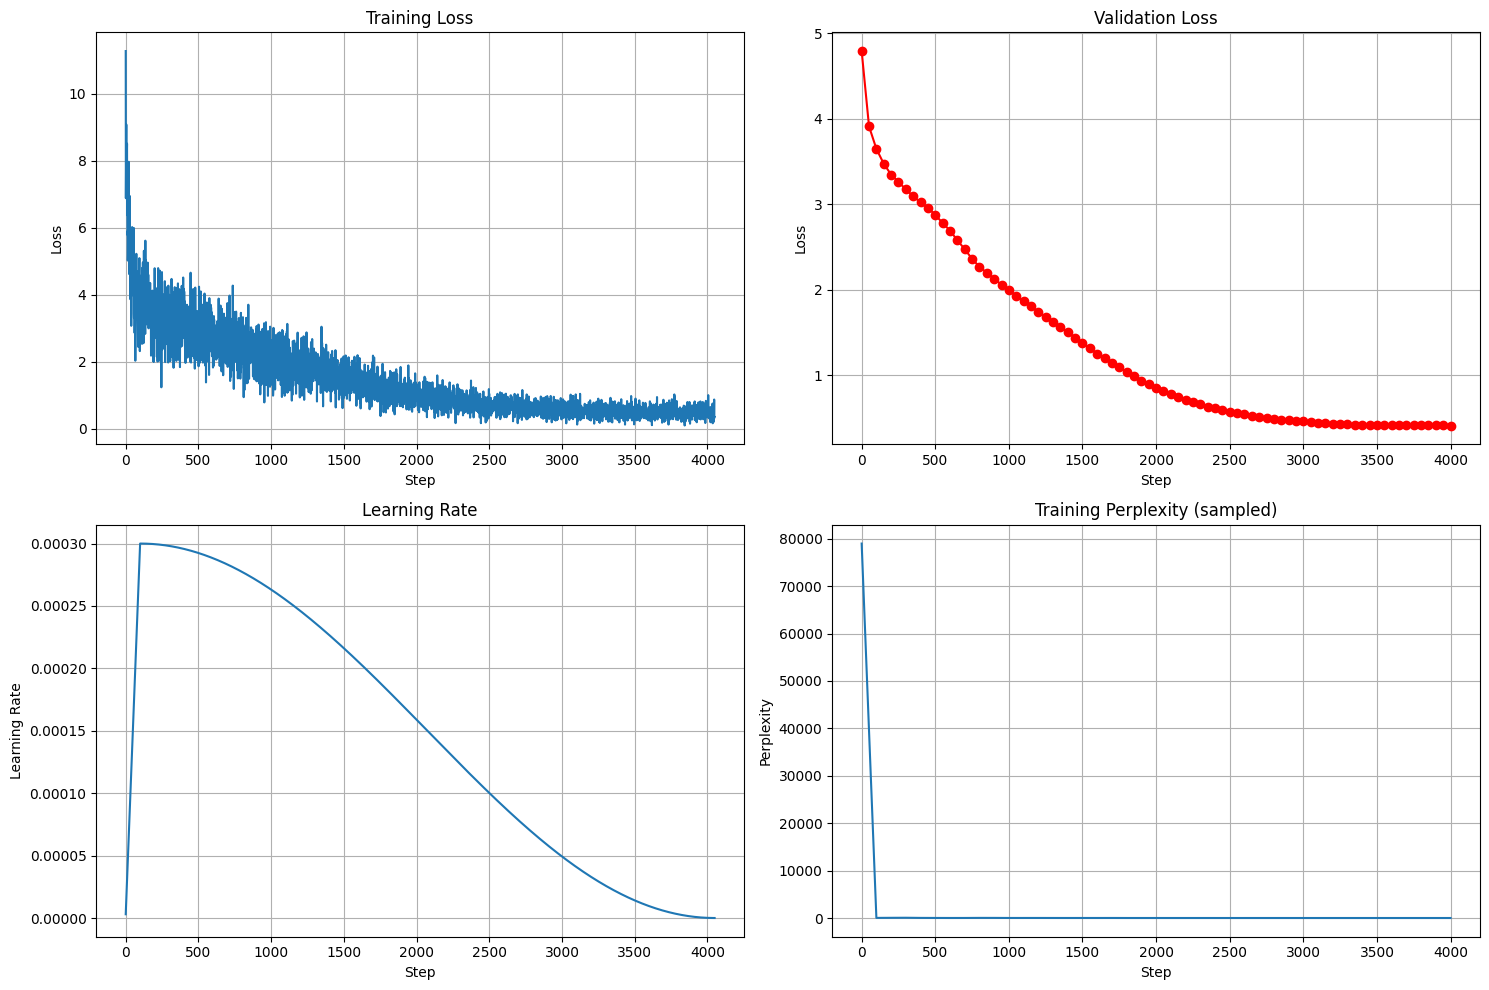


TESTING TEXT GENERATION

Prompt: The future of artificial intelligence
Generated: The future of artificial intelligence of artificial intelligence of artificial intelligence of artificial intelligence of artificial intelligence artificial intelligence of artificial intelligence artificial intelligence artificial intelligence artificial intelligence artificial intelligence artificial intelligence artificial intelligence artificial

Prompt: Once upon a time
Generated: Once upon a time time time time demand time demand time scales time time time time time time time time time time time time time time time time time time time time time time

Prompt: Machine learning is
Generated: Machine learning is learning is learning is learning is learning learning learning learning learning is learning learning learning learning learning learning learning learning learning learning learning learning learning learning learning learning learning learning

Training completed successfully!


In [53]:
# ================================
# Example Usage
# ================================
5
def run_training_example():
    """Run the complete training example."""
    print("="*60)
    print("GPT-2 TRAINING EXAMPLE")
    print("="*60)

    # Train the model
    trained_model, history = train_gpt2()

    # Plot training curves
    plot_training_curves(
        history['train_losses'],
        history['val_losses'],
        history['learning_rates']
    )

    # Test generation with trained model
    print("\n" + "="*60)
    print("TESTING TEXT GENERATION")
    print("="*60)

    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

    test_prompts = [
        "The future of artificial intelligence",
        "Once upon a time",
        "Machine learning is"
    ]

    for prompt in test_prompts:
        print(f"\nPrompt: {prompt}")
        generated = generate_text_advanced(
            trained_model, tokenizer, prompt,
            max_new_tokens=30, temperature=0.8
        )
        print(f"Generated: {generated}")

    print("\nTraining completed successfully!")

# Uncomment the line below to run the training
run_training_example()

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
import shutil

# Define source file and destination path in Google Drive
source_file = '/content/checkpoints/latest.pt'
destination_path = '/content/drive/My Drive/latest_llm_mqa.pt'

# Move or copy the file to Google Drive
shutil.copy(source_file, destination_path)

print("File saved to Google Drive.")

File saved to Google Drive.


In [56]:
# GPT-2 Model Loading and Inference
# This notebook contains code to load trained GPT-2 models and perform inference

import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import os
import json
import pickle
from transformers import GPT2Tokenizer
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Optional, Union
import time

# Import the model classes (assuming they are defined in previous cells or imported)
# Make sure to include all your model classes: GPT2, TransformerBlock, MultiHeadAttention, etc.

# ================================
# Model Loading Functions
# ================================

class ModelLoader:
    """Utility class for loading trained GPT-2 models."""

    def __init__(self, model_path: str, device: str = None):
        """
        Initialize the model loader.

        Args:
            model_path: Path to the saved model checkpoint
            device: Device to load the model on ('cuda' or 'cpu')
        """
        self.model_path = model_path
        self.device = device if device else ('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = None
        self.tokenizer = None
        self.config = None

    def load_model(self):
        """Load the trained model from checkpoint."""
        print(f"Loading model from: {self.model_path}")
        print(f"Using device: {self.device}")

        # Load checkpoint
        checkpoint = torch.load(self.model_path, map_location=self.device)

        # Extract configuration
        self.config = checkpoint.get('config', None)
        if self.config is None:
            raise ValueError("No configuration found in checkpoint. Please ensure the checkpoint contains 'config' key.")

        print(f"Model configuration: {self.config}")

        # Initialize model with loaded config
        self.model = GPT2(self.config)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.model.to(self.device)
        self.model.eval()

        # Load tokenizer
        self.tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
        self.tokenizer.pad_token = self.tokenizer.eos_token

        # Print model info
        total_params = sum(p.numel() for p in self.model.parameters())
        print(f"Model loaded successfully!")
        print(f"Total parameters: {total_params:,}")
        print(f"Training epoch: {checkpoint.get('epoch', 'Unknown')}")
        print(f"Training step: {checkpoint.get('step', 'Unknown')}")
        print(f"Training loss: {checkpoint.get('loss', 'Unknown'):.4f}")

        return self.model, self.tokenizer, self.config

    def get_model_info(self):
        """Get detailed information about the loaded model."""
        if self.model is None:
            return "Model not loaded yet. Call load_model() first."

        info = {
            "config": self.config,
            "total_parameters": sum(p.numel() for p in self.model.parameters()),
            "trainable_parameters": sum(p.numel() for p in self.model.parameters() if p.requires_grad),
            "model_size_mb": sum(p.numel() * p.element_size() for p in self.model.parameters()) / (1024 * 1024),
            "device": str(next(self.model.parameters()).device)
        }
        return info

In [57]:
# ================================
# Text Generation Classes
# ================================

class TextGenerator:
    """Advanced text generation with multiple sampling strategies."""

    def __init__(self, model, tokenizer, device):
        self.model = model
        self.tokenizer = tokenizer
        self.device = device
        self.model.eval()

    def generate_greedy(self, prompt: str, max_new_tokens: int = 50,
                       context_size: Optional[int] = None) -> str:
        """
        Generate text using greedy decoding (always pick the most likely token).

        Args:
            prompt: Input text prompt
            max_new_tokens: Maximum number of new tokens to generate
            context_size: Maximum context size to consider

        Returns:
            Generated text including the original prompt
        """
        # Encode the prompt
        input_ids = torch.tensor(self.tokenizer.encode(prompt)).unsqueeze(0).to(self.device)

        if context_size is None:
            context_size = self.model.positional_encoding.pe.size(1)

        with torch.no_grad():
            for _ in range(max_new_tokens):
                # Crop context if necessary
                input_cond = input_ids[:, -context_size:]

                # Get predictions
                logits = self.model(input_cond)

                # Get the logits for the last token
                next_token_logits = logits[:, -1, :]

                # Get the most likely token (greedy)
                next_token_id = torch.argmax(next_token_logits, dim=-1, keepdim=True)

                # Append to sequence
                input_ids = torch.cat([input_ids, next_token_id], dim=1)

                # Stop if EOS token
                if next_token_id.item() == self.tokenizer.eos_token_id:
                    break

        return self.tokenizer.decode(input_ids[0], skip_special_tokens=True)

    def generate_with_temperature(self, prompt: str, max_new_tokens: int = 50,
                                temperature: float = 1.0, context_size: Optional[int] = None) -> str:
        """
        Generate text using temperature sampling.

        Args:
            prompt: Input text prompt
            max_new_tokens: Maximum number of new tokens to generate
            temperature: Sampling temperature (higher = more random)
            context_size: Maximum context size to consider

        Returns:
            Generated text including the original prompt
        """
        input_ids = torch.tensor(self.tokenizer.encode(prompt)).unsqueeze(0).to(self.device)

        if context_size is None:
            context_size = self.model.positional_encoding.pe.size(1)

        with torch.no_grad():
            for _ in range(max_new_tokens):
                input_cond = input_ids[:, -context_size:]
                logits = self.model(input_cond)

                # Apply temperature
                next_token_logits = logits[:, -1, :] / temperature

                # Sample from the distribution
                probs = F.softmax(next_token_logits, dim=-1)
                next_token_id = torch.multinomial(probs, 1)

                input_ids = torch.cat([input_ids, next_token_id], dim=1)

                if next_token_id.item() == self.tokenizer.eos_token_id:
                    break

        return self.tokenizer.decode(input_ids[0], skip_special_tokens=True)

    def generate_top_k(self, prompt: str, max_new_tokens: int = 50,
                      temperature: float = 1.0, top_k: int = 50,
                      context_size: Optional[int] = None) -> str:
        """
        Generate text using top-k sampling.

        Args:
            prompt: Input text prompt
            max_new_tokens: Maximum number of new tokens to generate
            temperature: Sampling temperature
            top_k: Number of top tokens to consider
            context_size: Maximum context size to consider

        Returns:
            Generated text including the original prompt
        """
        input_ids = torch.tensor(self.tokenizer.encode(prompt)).unsqueeze(0).to(self.device)

        if context_size is None:
            context_size = self.model.positional_encoding.pe.size(1)

        with torch.no_grad():
            for _ in range(max_new_tokens):
                input_cond = input_ids[:, -context_size:]
                logits = self.model(input_cond)
                next_token_logits = logits[:, -1, :] / temperature

                # Apply top-k filtering
                if top_k > 0:
                    top_k_logits, top_k_indices = torch.topk(next_token_logits, top_k)
                    # Set all other logits to -inf
                    filtered_logits = torch.full_like(next_token_logits, float('-inf'))
                    filtered_logits.scatter_(0, top_k_indices, top_k_logits)
                    next_token_logits = filtered_logits

                # Sample
                probs = F.softmax(next_token_logits, dim=-1)
                next_token_id = torch.multinomial(probs, 1)

                input_ids = torch.cat([input_ids, next_token_id], dim=1)

                if next_token_id.item() == self.tokenizer.eos_token_id:
                    break

        return self.tokenizer.decode(input_ids[0], skip_special_tokens=True)

    def generate_top_p(self, prompt: str, max_new_tokens: int = 50,
                      temperature: float = 1.0, top_p: float = 0.9,
                      context_size: Optional[int] = None) -> str:
        """
        Generate text using nucleus (top-p) sampling.

        Args:
            prompt: Input text prompt
            max_new_tokens: Maximum number of new tokens to generate
            temperature: Sampling temperature
            top_p: Cumulative probability threshold
            context_size: Maximum context size to consider

        Returns:
            Generated text including the original prompt
        """
        input_ids = torch.tensor(self.tokenizer.encode(prompt)).unsqueeze(0).to(self.device)

        if context_size is None:
            context_size = self.model.positional_encoding.pe.size(1)

        with torch.no_grad():
            for _ in range(max_new_tokens):
                input_cond = input_ids[:, -context_size:]
                logits = self.model(input_cond)
                next_token_logits = logits[:, -1, :] / temperature

                # Apply top-p filtering
                if top_p < 1.0:
                    sorted_logits, sorted_indices = torch.sort(next_token_logits, descending=True)
                    cumulative_probs = torch.cumsum(F.softmax(sorted_logits, dim=-1), dim=-1)

                    # Remove tokens with cumulative probability above threshold
                    sorted_indices_to_remove = cumulative_probs > top_p
                    sorted_indices_to_remove[1:] = sorted_indices_to_remove[:-1].clone()
                    sorted_indices_to_remove[0] = 0

                    indices_to_remove = sorted_indices[sorted_indices_to_remove]
                    next_token_logits[indices_to_remove] = float('-inf')

                # Sample
                probs = F.softmax(next_token_logits, dim=-1)
                next_token_id = torch.multinomial(probs, 1)

                input_ids = torch.cat([input_ids, next_token_id], dim=1)

                if next_token_id.item() == self.tokenizer.eos_token_id:
                    break

        return self.tokenizer.decode(input_ids[0], skip_special_tokens=True)

    def generate_batch(self, prompts: List[str], max_new_tokens: int = 50,
                      method: str = "temperature", **kwargs) -> List[str]:
        """
        Generate text for multiple prompts in batch.

        Args:
            prompts: List of input prompts
            max_new_tokens: Maximum number of new tokens to generate
            method: Generation method ('greedy', 'temperature', 'top_k', 'top_p')
            **kwargs: Additional arguments for the generation method

        Returns:
            List of generated texts
        """
        results = []
        for prompt in prompts:
            if method == "greedy":
                result = self.generate_greedy(prompt, max_new_tokens, **kwargs)
            elif method == "temperature":
                result = self.generate_with_temperature(prompt, max_new_tokens, **kwargs)
            elif method == "top_k":
                result = self.generate_top_k(prompt, max_new_tokens, **kwargs)
            elif method == "top_p":
                result = self.generate_top_p(prompt, max_new_tokens, **kwargs)
            else:
                raise ValueError(f"Unknown generation method: {method}")

            results.append(result)

        return results

In [68]:
# Load your model
loader = ModelLoader("/content/models/gpt2_final.pt")
# loder = ModelLoader("/content/drive/My Drive/latest_llm.pt")
model, tokenizer, config = loader.load_model()
generator = TextGenerator(model, tokenizer, loader.device)

# Generate with specific parameters
result = generator.generate_top_p(
    prompt="The release of ChatGPT led",
    max_new_tokens=50,
    temperature=1,
    top_p=0.95
)
print(result)

Loading model from: /content/models/gpt2_final.pt
Using device: cuda
Model configuration: {'vocab_size': 50257, 'context_length': 512, 'emb_dim': 512, 'n_heads': 4, 'n_layers': 4, 'drop_rate': 0.1, 'qkv_bias': False}
Model loaded successfully!
Total parameters: 62,543,953
Training epoch: 5
Training step: 4050
Training loss: 0.4107
The release of ChatGPT led Created ranked descriptionng412 CommissionCHECK citizensani Innovationienciesposal budget VersVi violating criticised commandskov grossly avoiding Universities Hyderabadcul Nyvier senior ScreenMR sees Lansing teninge Rocstadter Though Craneks investors Desktop Courgs336 comparisons slavery voluntarilyneroor
